# My Start of Strava Wrapped

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.colors import LinearSegmentedColormap

class StopExecution(Exception):
    def _render_traceback_(self):
        pass


/Users/brendanlai/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load data and some data management
df = pd.read_csv("data/activities.csv")
df['Activity Date'] = pd.to_datetime(df['Activity Date'])
df = df.sort_values(by=['Activity Date'])
df['Elapsed_min'] = df['Elapsed Time'].div(60)
df['Avg_speed_kmh'] = df['Distance'].div(df['Elapsed Time'] / 3600)


# Define the predetermined list
misc_activity_list = ['Workout','Canoe','Kayaking','Weight Training','Rowing','Swim','Stand Up Paddling','Rock Climb','Hike','Walk']

# Create a new column 'New_Value' based on the condition
df['grouped_activity_types'] = df['Activity Type'].apply(lambda x: 'Misc' if x in misc_activity_list else ('Hockey/Soccer' if x in ['Football (Soccer)', 'Ice Skate'] else x))

# df.info()

# Filter data for the year 2023
df_2023 = df[df['Activity Date'].dt.year == 2023]


### These were your most popular activities in the past year!

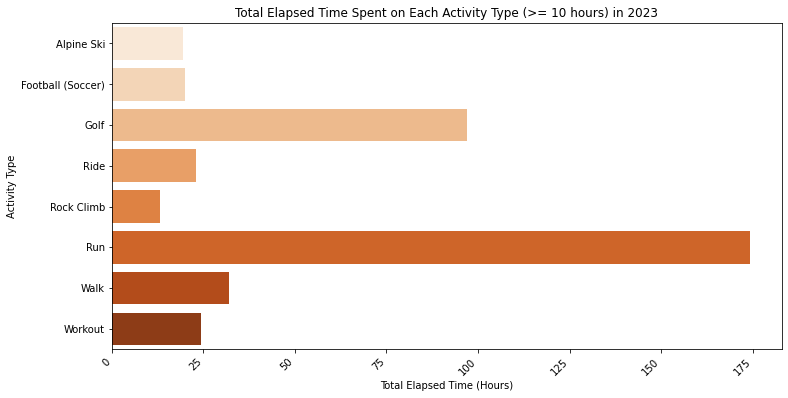

In [3]:
# Group by Activity Type and sum the Elapsed Time
activity_time_totals = df_2023.groupby('Activity Type')['Elapsed_min'].sum().reset_index()

# Filter out activities with less than 600 minutes
activity_time_totals = activity_time_totals[activity_time_totals['Elapsed_min'] >= 600]

# Divide 'Elapsed_min' by 60 to convert from minutes to hours
activity_time_totals['Elapsed_hours'] = activity_time_totals['Elapsed_min'] / 60

# Create a bar plot with an orange-themed palette
plt.figure(figsize=(12, 6))
sns.barplot(y='Activity Type', x='Elapsed_hours', data=activity_time_totals, palette='Oranges')

plt.title('Total Elapsed Time Spent on Each Activity Type (>= 10 hours) in 2023')
plt.ylabel('Activity Type')
plt.xlabel('Total Elapsed Time (Hours)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

### However one activity stood out to you this year...

In [18]:
# Group by Activity Type and sum the Elapsed Time
activity_time_totals = df_2023.groupby('Activity Type')['Elapsed_min'].sum().reset_index()

max_activity_type = activity_time_totals.loc[activity_time_totals['Elapsed_min'].idxmax()]

print(f"This year you spent {max_activity_type['Elapsed_min']:.1f} minutes doing this activity the past year: {max_activity_type['Activity Type']}")
print(f"That's {(max_activity_type['Elapsed_min'] / (60*24)):.1f} days straight 🤯🤯🤯! Congrats on getting that much fitter this year!")

print(f"Your total activity time was {df_2023['Elapsed_min'].sum():.1f} minutes which is equivalent to {(df_2023['Elapsed_min'].sum()/ (60*24)):.1f} days of straight activity ") 

This year you spent 10452.5 minutes doing this activity the past year: Run
That's equivalent to 7.3 days straight! That's crazy! 🤯🤯🤯
Your total activity time was 25443.0 minutes which is equivalent to 17.7 days of straight activity 


### This was your monthly activity breakdowns throughout the year by elapsed time (min)

<Figure size 1080x720 with 0 Axes>

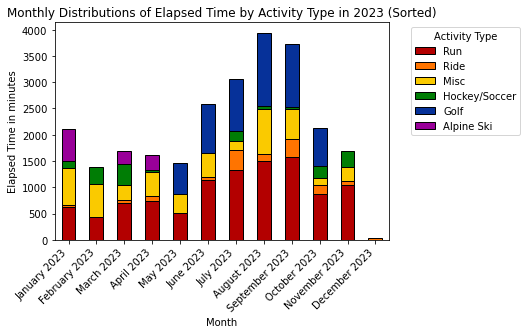

In [25]:

# Group by 'Activity Date' and 'Activity Type' and calculate the sum of 'Elapsed_min' for each month
monthly_activity_totals = df_2023.groupby([df_2023['Activity Date'].dt.to_period("M"), 'grouped_activity_types'])['Elapsed_min'].sum().unstack()
monthly_sums = df_2023.resample('M', on='Activity Date')['Elapsed_min'].sum()

# Sort columns within each row by the total elapsed time
monthly_activity_totals = monthly_activity_totals.apply(lambda row: row.sort_values(ascending=True), axis=1)
monthly_activity_totals = monthly_activity_totals.iloc[:, ::-1]

# Plot the stacked bar chart
plt.figure(figsize=(15, 10))

colors_six_groups = [(0.7, 0, 0), (1, 0.45, 0), (1, 0.8, 0), (0, 0.5, 0), (0, 0.2, 0.6), (0.6, 0, 0.6)]  # RGB values for distinct colors
custom_cmap = LinearSegmentedColormap.from_list('custom_six_groups', colors_six_groups, N=100)

monthly_activity_totals.plot(kind='bar', stacked=True, colormap=custom_cmap, edgecolor='black', orientation='vertical')

# Show ticks as months with a custom date format
unique_months = pd.to_datetime(monthly_sums.index).to_period('M').astype(str).unique()

# Format date labels in word format
formatted_labels = [pd.to_datetime(month).strftime('%B %Y') for month in unique_months]

plt.xticks(range(len(formatted_labels)), formatted_labels, rotation=45, ha='right')

plt.title('Monthly Distributions of Elapsed Time by Activity Type in 2023 (Sorted)', loc='center')
plt.xlabel('Month')
plt.ylabel('Elapsed Time in minutes')
plt.legend(title='Activity Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### You worked hard throughout the year! Here's the breakdown of your monthly relative efforts

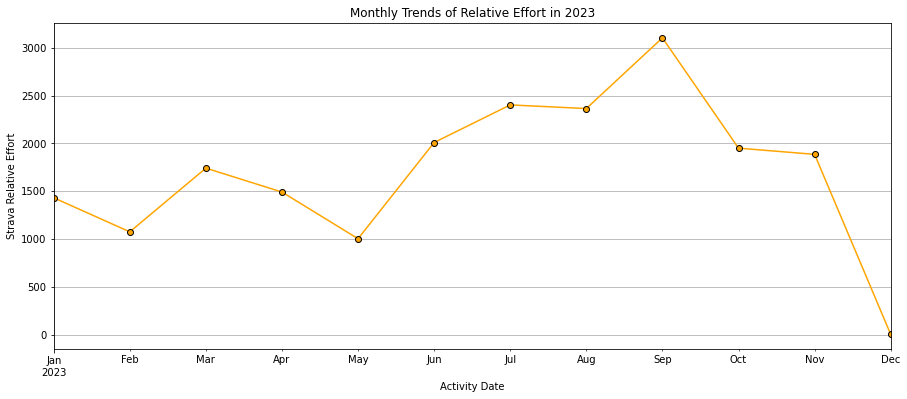

In [5]:
# monthly relative efforts
monthly_sums = df_2023.resample('M', on='Activity Date')['Relative Effort'].sum()

# Plot the data as a line chart
plt.figure(figsize=(15, 6))  # Adjust the width by changing the first value in figsize
monthly_sums.plot(kind='line', marker='o', color='orange', markeredgecolor='black')

plt.title('Monthly Trends of Relative Effort in 2023')
plt.xlabel('Activity Date')
plt.ylabel('Strava Relative Effort')
plt.grid(True)  # Add grid lines for better readability

plt.show()

In [6]:
# Hardest efforts calcualtions
hardestEfforts = df_2023.nlargest(5, columns="Relative Effort")

print(f"You had some crazy efforts this year! Here are the 5 highest efforts of your year\n")

# Print header
print(f"{'#':<5} {'Activity Name':<45} {'Relative Effort':<18} {'Activity Type':<15} {'Distance (km)':<15} {'Elapsed Time (min)'}")

# Print each row with formatted spacing
for i, (index, row) in enumerate(hardestEfforts.iterrows(), 1):
    print(f"{i:<5} {row['Activity Name']:<45} {row['Relative Effort']:<18} {row['Activity Type']:<15} {row['Distance']:<15.1f} {row['Elapsed_min']:<10.1f}")


You had some crazy efforts this year! Here are the 5 highest efforts of your year

#     Activity Name                                 Relative Effort    Activity Type   Distance (km)   Elapsed Time (min)
1     Toronto waterfront marathon                   552.0              Run             42.7            212.3     
2     15.5 big kahuna                               341.0              Run             34.7            180.6     
3     14.4 worked                                   293.0              Run             29.0            158.4     
4     13.4 Friday long runs >                       280.0              Run             26.0            136.4     
5     9.7 celebrating the return of the prem        243.0              Run             32.3            167.6     


In [7]:
# Elevation comps

# Dictionary with heights and depths of popular landmarks
elevationComps = {
    "Marianas Trench Depth": 11521,
    "Mount Everest": 8849,
    "Mount Kilimanjaro": 5895,
    "Antarctic Summits": 4500,
    "Mount Fuji": 3778,
    "Grand Canyon Depth": 1828,
    "Burj Khalifa": 830,
    "One World Trade Center": 541,
    "Eiffel Tower": 330,
}

# Ensure elevaation comps is sorted descending
elevationComps = dict(sorted(elevationComps.items(), key=lambda item: item[1], reverse=True))

# find most done activity
activity_type_mode = df_2023['Activity Type'].mode()[0]
df_type_mode = df_2023[df_2023['Activity Type'] == activity_type_mode]
gained2023 = df_type_mode['Elevation Gain'].sum()

minLandmark = min(elevationComps.items(), key=lambda item: item[1])[1]
if gained2023 < minLandmark:
    gained2023 = df_2023['Elevation Gain'].sum()
    if gained2023 < minLandmark:
        raise StopExecution("Stop execution at this point")
    else:
        activity_type_mode = "activitie"

tallest_landmark = ""

for key, value in elevationComps.items():
    if gained2023 > value:
        tallest_landmark = (key, value)
        break
        
# Print statements
if "depth" in tallest_landmark[0].lower():
    print(f"Combining your all your {activity_type_mode}s this year you would have been able to climb out of the {tallest_landmark[0].split('Depth')[0]}({tallest_landmark[1]}m).")
    print(f"Congratulations on gaining {gained2023:.0f}m total this past year!")
else:
    print(f"Combining your all your {activity_type_mode}s this year you would have climbed the {tallest_landmark[0]}({tallest_landmark[1]}m) and more!")
    print(f"Congratulations on gaining {gained2023:.0f}m total this past year!")

Combining your all your Runs this year you would have been able to climb out of the Marianas Trench (11521m).
Congratulations on gaining 13462m total this past year!


In [8]:
# Temperature calculations
maxTemp = df_2023.loc[[df_2023['Apparent Temperature'].idxmax()]]
minTemp = df_2023.loc[[df_2023['Apparent Temperature'].idxmin()]]

if maxTemp['Apparent Temperature'].values[0] > 28 and minTemp['Apparent Temperature'].values[0] < 0:
    
    print("This year no bad weather was keeping you inside! You managed to get out there in some pretty wicked conditions")
    # Convert 'Activity Date' to "Mon - Day - Year" format
    if maxTemp['Apparent Temperature'].values[0] > 28: 
        formatted_date = np.datetime_as_string( maxTemp['Activity Date'].values[0], unit='D')  # Format as YYYY-MM-DD
        print("\nThe heat was no match for you! 🔥")
        print(f"In {maxTemp['Activity Name'].values[0]} you managed to {maxTemp['Activity Type'].values[0]} for {maxTemp['Elapsed_min'].values[0]:.1f} minutes in {maxTemp['Apparent Temperature'].values[0]:.1f}°C heat 🥵 on {formatted_date}")
    
    if minTemp['Apparent Temperature'].values[0] < 0:
        formatted_date = np.datetime_as_string( minTemp['Activity Date'].values[0], unit='D')  # Format as YYYY-MM-DD
        print("\nYou even outlasted the cold too! ❄️")
        print(f"In {minTemp['Activity Name'].values[0]} you managed to {minTemp['Activity Type'].values[0]} for {minTemp['Elapsed_min'].values[0]:.1f} minutes in the cold {minTemp['Apparent Temperature'].values[0]:.1f}°C 🥶 on {formatted_date}")
    

This year no bad weather was keeping you inside! You managed to get out there in some pretty wicked conditions

The heat was no match for you! 🔥
In Post mini disaster you managed to Run for 55.0 minutes in 34.4°C heat 🥵 on 2023-05-18

You even outlasted the cold too! ❄️
In Lunch skate you managed to Ice Skate for 15.8 minutes in the cold -8.1°C 🥶 on 2023-11-29


### You used a variety of shoes, bikes, and other gear this year. Here's the breakdown of which ones were your favourites

/Users/brendanlai/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129389 (\N{MANGO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


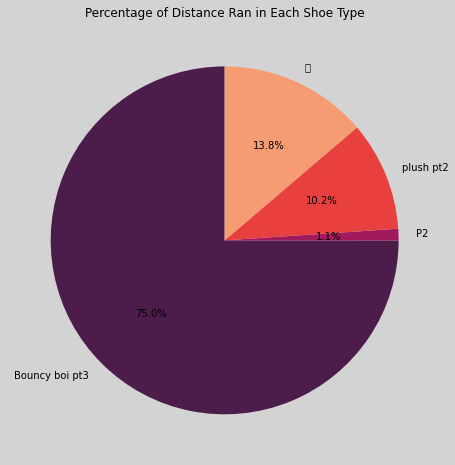

In [9]:
# Group by 'Activity Gear' and calculate the total distance for each gear
gear_distance_totals = df_2023.groupby('Activity Gear')['Distance'].sum()

# Create a custom color palette from Seaborn
custom_palette = sns.color_palette("rocket", n_colors=len(gear_distance_totals))

# Create a pie chart with the custom color palette
plt.figure(figsize=(8, 8), facecolor='lightgrey')
plt.pie(gear_distance_totals, labels=gear_distance_totals.index, autopct='%1.1f%%', colors=custom_palette, startangle=90)
plt.title('Percentage of Distance Ran in Each Shoe Type')
plt.show()